### SEGMENTATION DE CLIENT : K-Means Clustering sur le dataset Live

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Importation du dataset
df = pd.read_csv("/Users/user/Desktop/DATA7/Live.csv")

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
# Nettoyage et préparation
# Suppression des colonnes inutiles
df = df.drop(columns=['status_id','status_published','Column1','Column2','Column3','Column4'])

In [5]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [7]:
# Encodage de la variable catégorielle 'status_type'
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

In [8]:
df.status_type.value_counts()

status_type
1    4288
3    2334
2     365
0      63
Name: count, dtype: int64

In [9]:
# Vérification des valeurs manquantes
df.isna().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [10]:
# Normalisation des données
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### construction de modele k-means

In [11]:
## 5. Détermination du nombre optimal de clusters
# Tester plusieurs valeurs de k
inertia = []
silhouette = []
K = range(2, 11)  # tester k de 2 à 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))


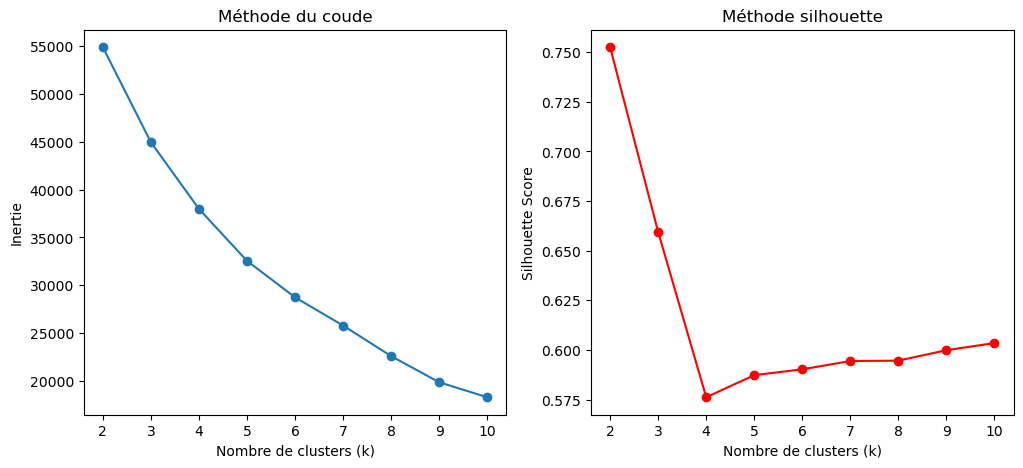

In [12]:
# Visualisation du coude
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode du coude")

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='red')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode silhouette")

plt.show()

In [13]:
# Trouver automatiquement le k optimal selon le meilleur score silhouette
best_k = K[silhouette.index(max(silhouette))]
print(f"✅ Le meilleur k (selon silhouette) est : {best_k}")

✅ Le meilleur k (selon silhouette) est : 2


In [14]:

# ========= 1. Entraînement du modèle avec le meilleur k =========
best_k = K[silhouette.index(max(silhouette))]
print(f"Meilleur k choisi automatiquement : {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

Meilleur k choisi automatiquement : 2


In [15]:
# ========= 3. Analyse des clusters =========
print("\nNombre d'observations par cluster :")
print(df['cluster'].value_counts())

print("\nMoyenne des variables par cluster :")
print(df.groupby('cluster').mean())


Nombre d'observations par cluster :
cluster
0    6741
1     309
Name: count, dtype: int64

Moyenne des variables par cluster :
         status_type  num_reactions  num_comments  num_shares   num_likes  \
cluster                                                                     
0           1.649755     206.654057     93.686545   19.548732  198.683281   
1           2.909385     741.977346   3074.980583  486.669903  571.941748   

          num_loves   num_wows  num_hahas  num_sads  num_angrys  
cluster                                                          
0          6.819611   0.645898   0.314938  0.137813    0.049696  
1        141.637540  15.326861   9.019417  2.553398    1.498382  


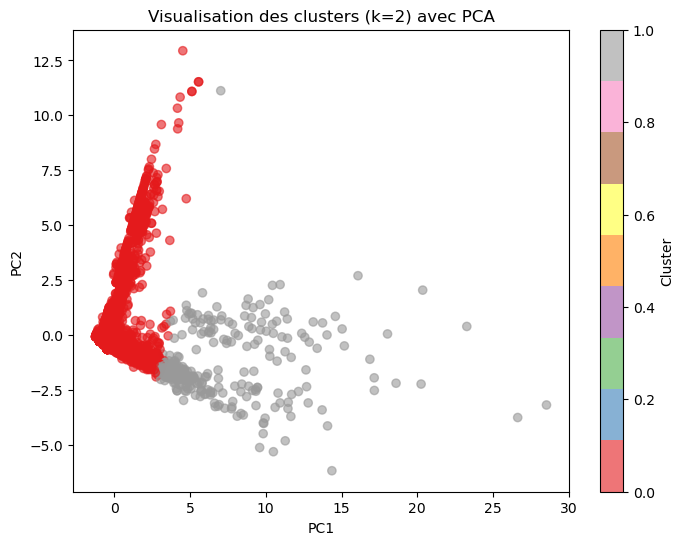

In [16]:

from sklearn.decomposition import PCA
# ========= 4. Visualisation PCA =========
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap="Set1", alpha=0.6)
plt.title(f"Visualisation des clusters (k={best_k}) avec PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

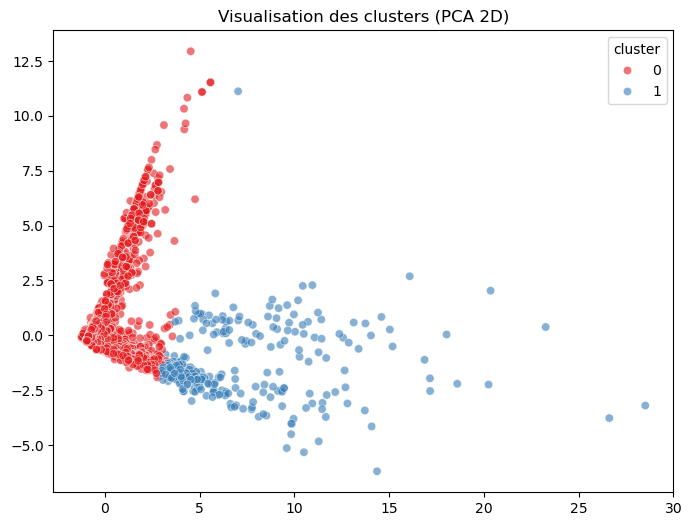

In [17]:
## 7. Visualisation (PCA pour 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set1', alpha=0.6)
plt.title('Visualisation des clusters (PCA 2D)')
plt.show()

In [19]:
import pickle
# ========= 2. Sauvegarde avec pickle =========
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)